# EX 1
Write a multivariate stable distribution generator for any given discrete spectral mea-
sure and parameter α. Consider only 2 dimensional case. Present your simulated
sample on scatterplot. Simulate the following cases

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st

sns.set()
pi = np.pi

In [2]:
def stable_random_variables_a(alpha):
    if alpha == 1:
        Omega = np.random.uniform(-pi/2, pi/2)
        return np.tan(Omega)
    else:
        Omega = np.random.uniform(-pi/2, pi/2)
        W = np.random.exponential(1)
        return np.sin(alpha*Omega)/np.cos(Omega)**(1/alpha)*(np.cos((alpha-1)*Omega)/W)**((1-alpha)/alpha)
    
def stable_random_variables_b(alpha, beta):
    Omega = np.random.uniform(-pi/2, pi/2)
    W = np.random.exponential(1)
    Delta_0 = np.arctan(beta*np.tan(pi*alpha/2))/alpha

    if alpha == 1:
        return 2/pi*((pi/2+beta*Omega)*np.tan(Omega)-beta*np.log(pi/2*W*np.cos(Omega)/(pi/2+beta*Omega)))
    else:
        a = np.sin(alpha*(Delta_0+Omega))/(np.cos(alpha*Delta_0)*np.cos(Omega))**(1/alpha)
        b = (np.cos(alpha*Delta_0+(alpha-1)*Omega)/W)**((1-alpha)/alpha)
        return a*b

def stable_random_variables_0(alpha, beta, gamma, delta):
    Z = stable_random_variables_a(alpha, beta)
    if alpha == 1:
        return gamma*Z+delta
    else:
        return gamma*(Z - beta*np.tan(pi*alpha/2)) + delta


def stable_random_variables_1(alpha, beta, gamma, delta):
    Z = stable_random_variables_b(alpha, beta)
    if alpha == 1:
        return gamma*Z + (delta + beta*2/pi*gamma*np.log(gamma))
    else:
        return gamma*Z+delta
    
def stable_random_variables(alpha, beta, gamma=1, delta=0, stable_type = 1):
    if stable_type == 1:
        return stable_random_variables_1(alpha, beta, gamma, delta)
    elif stable_type ==0:
        return stable_random_variables_0(alpha, beta, gamma, delta)
    else:
        raise ValueError("Select bad stable_type!!!")

In [3]:
def multivariate_stable_distributions(alpha, array):
    n = array.shape[0]
    Z = [stable_random_variables(alpha=alpha, beta=1) for _ in range(n)]
    if alpha == 1:
        return np.sum(array[:,1:].T*array[:,0]**(1/alpha) * Z, axis=1)
    else:
        return np.sum(array[:,1:].T*array[:,0]**(1/alpha)*(Z+ 2/pi*np.log(array[:,0])),axis=1)

## a) symmetric stable vector

In [4]:
alpha = 0.9
arr1 = np.array([
    [0.25 ,  1  , 0],
    [0.125,  1/2, np.sqrt(3)/2],
    [0.25 , -1/2, np.sqrt(3)/2],
    [0.25 , -1  , 0],
    [0.125, -1/2, -np.sqrt(3)/2],
    [0.25 , 1/2 , -np.sqrt(3)/2],
])

In [ ]:
X = np.array([multivariate_stable_distributions(0.9 , arr1) for _ in range(50000)])

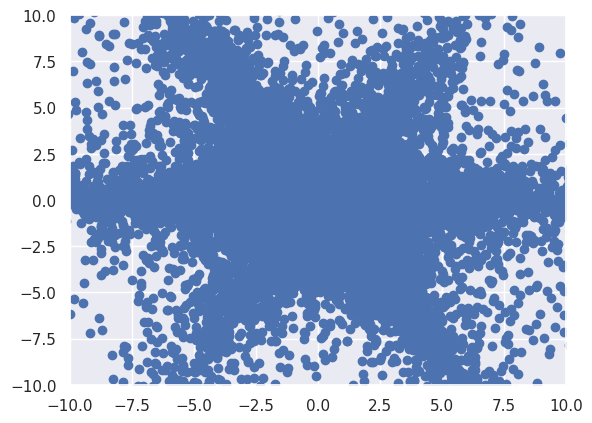

In [13]:
plt.scatter(X[:,0],X[:,1])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

/tmp/ipykernel_40891/2033997804.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(


(-2.0, 2.0)

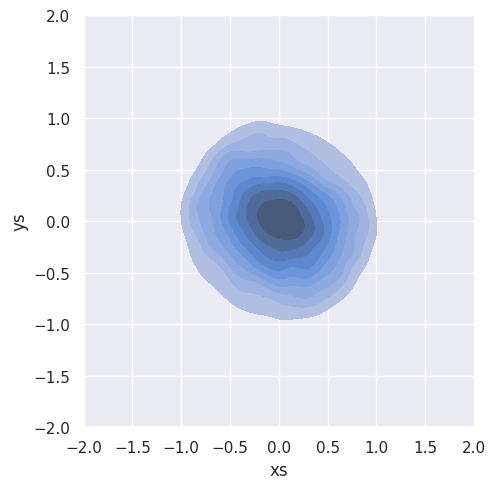

In [26]:
maskX = X[np.sqrt(X[:, 0]**2 + X[:, 1]**2) < 1]
sns.displot(
    data= pd.DataFrame(maskX, columns= ["xs","ys"]), x = "xs", y = "ys", kind="kde",fill=True
)
lim = 2
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

In [19]:
maskX = X[np.sqrt(X[:, 0]**2 + X[:, 1]**2) < 2]
x = maskX[:, 0]
y = maskX[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-2.39261636511565 2.393771312508613 -2.386536636159078 2.386735524345097


In [20]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

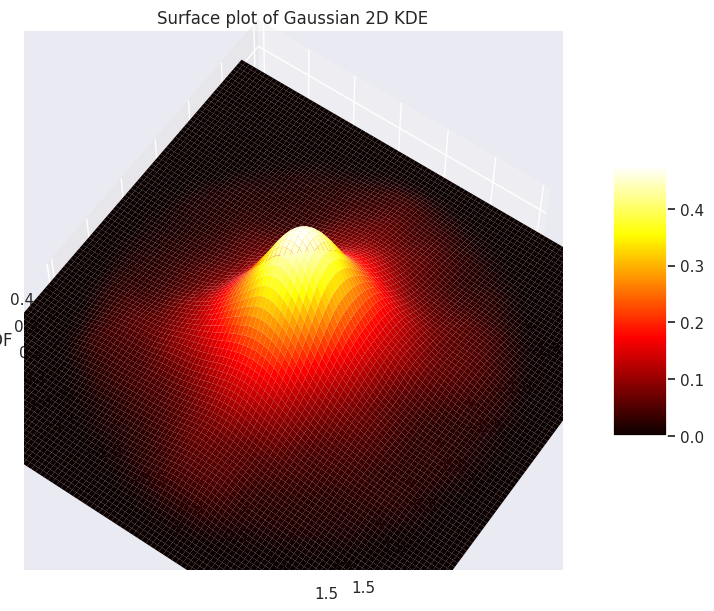

In [23]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
lim = 1.5
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

## b)

In [28]:
arr2 = np.array([
    [0.1 , 1  , 0],
    [0.3 , np.sqrt(3)/2, 1/2],
    [0.1 , 1/2, np.sqrt(3)/2],
    [0.3 , 0, 1],
    [0.1, -1/2, np.sqrt(3)/2],
])
alpha_2 =1.6

In [38]:
X_1_b = np.array([multivariate_stable_distributions(alpha_2, arr2) for _ in range(50000)])

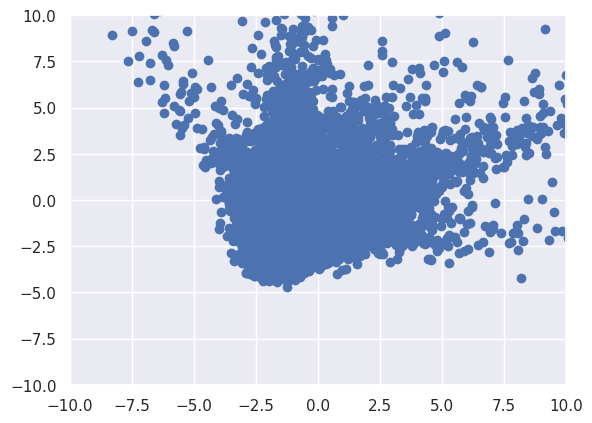

In [39]:
plt.scatter(X_1_b[:,0],X_1_b[:,1])
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

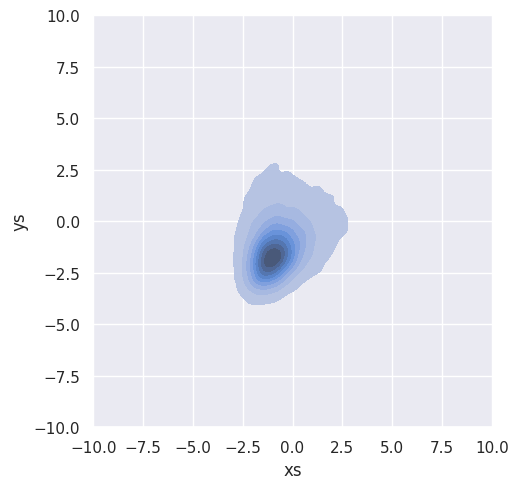

In [43]:
mask_1b = np.sqrt(X_1_b[:, 0]**2 + X_1_b[:, 1]**2) < 10
X_1_b_mask = X_1_b[mask_1b]
sns.displot(
    data= pd.DataFrame(X_1_b_mask, columns= ["xs","ys"]), x = "xs", y = "ys", kind="kde",fill=True
)
lim = 10
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()

In [44]:
mask_1b = np.sqrt(X_1_b[:, 0]**2 + X_1_b[:, 1]**2) < 10
X_1_b_mask = X_1_b[mask_1b]
x = maskX[:, 0]
y = maskX[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-2.3911839512511532 2.392027936671266 -2.396534061242645 2.3794321666915366


In [45]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

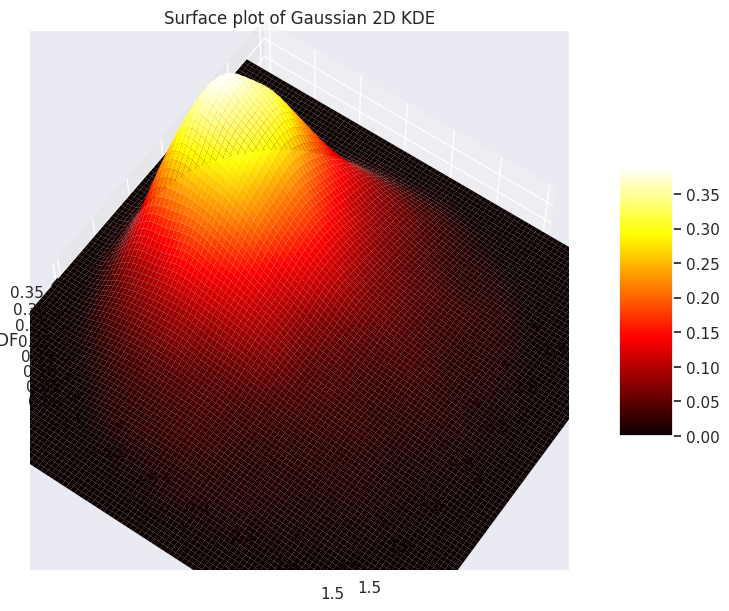

In [46]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='hot', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)
lim = 1.5
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)
plt.show()